# Body Density 
- This is an ML project to calculate density of a human. In this project i cleaned the data by removing outlier, making new variable  and finding out the factor depend on density.
- In this model i run Linear Regression model.

* In physics, density is defined as the mass of an object divided by its volume. Body density is essentially your compactness, or weight per square inch of space you occupy. Knowing your total body density is useful if you want to use it in an equation that helps you estimate your body fat percentage.Because excess fat puts you at risk for problems like type 2 diabetes and heart disease, body fat is healthy. can have a direct impact. Body density can be known by direct measurement of body weight and volume measured using water or air displacement.

In [1]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split  # Train test split
from sklearn.linear_model import LinearRegression     # Model development
from sklearn import metrics  

In [2]:
bf=pd.read_csv('/Users/anuraggupta/Documents/Project ML/bodyfat.csv')

In [3]:
bf.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## DICTIONARY

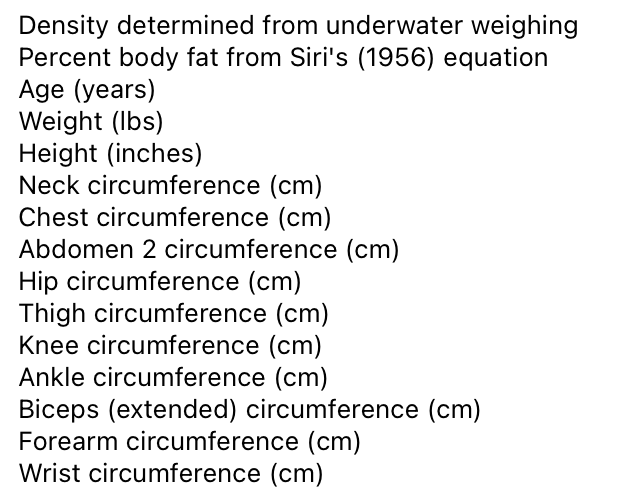

In [4]:
bf.shape

(252, 15)

* This Data has 252 records and 15 columns. 

In [7]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


* Data has all Numerical columns.

In [5]:
bf.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

* Data has 0 missing value.

In [9]:
bf.duplicated().sum()

0

* Data has null dublicate values.

## Univariate Analysis
* Analyzing the variable one by one.

In [6]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])


    plt.show()
    return myvalue

#### AGE

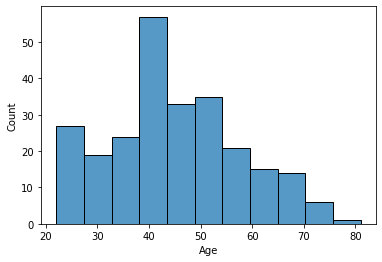

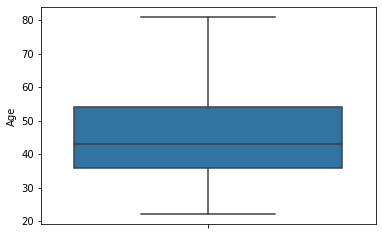

{'missing': 0,
 'min': 22,
 'max': 81,
 'mean': 44.88,
 'var': 158.81,
 'std': 12.6,
 'range': 59,
 'q1': 35.75,
 'q2': 43.0,
 'q3': 54.0,
 'skewness': 0.28,
 'kurtosis': -0.42}

In [7]:
univariate_num(data=bf,x='Age')

* 0 missing value.
* Positive Skewed Distribution.

#### WEIGHT

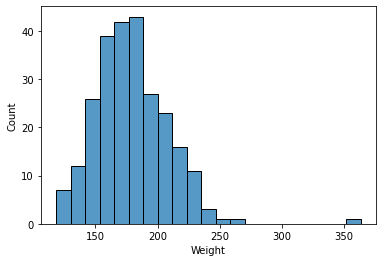

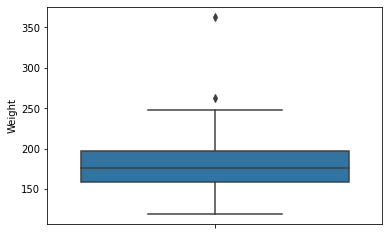

{'missing': 0,
 'min': 118.5,
 'max': 363.15,
 'mean': 178.92,
 'var': 863.72,
 'std': 29.39,
 'range': 244.65,
 'q1': 159.0,
 'q2': 176.5,
 'q3': 197.0,
 'skewness': 1.21,
 'kurtosis': 5.27}

In [9]:
univariate_num(data=bf,x='Weight')

* 0 missing value.
* Outlier on upper side in this variable.
* Positive Skewed Distribution.
* Lepto kurtosis.

#### HEIGHT

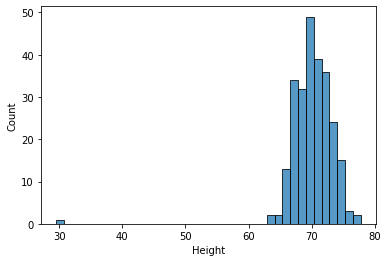

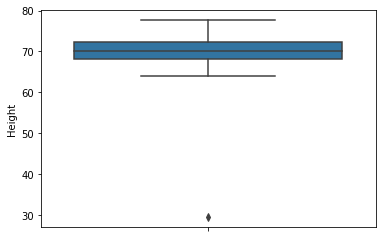

{'missing': 0,
 'min': 29.5,
 'max': 77.75,
 'mean': 70.15,
 'var': 13.42,
 'std': 3.66,
 'range': 48.25,
 'q1': 68.25,
 'q2': 70.0,
 'q3': 72.25,
 'skewness': -5.38,
 'kurtosis': 59.54}

In [10]:
univariate_num(data=bf,x='Height')

* 0 missing value.
* Outlier on lower side in this variable.
* Negative Skewed distribution.
* Lepto Kurtosis.

#### NECK

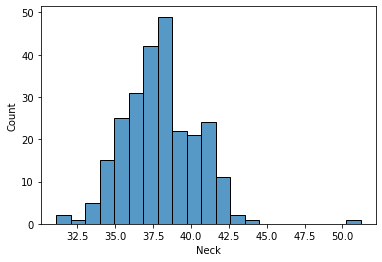

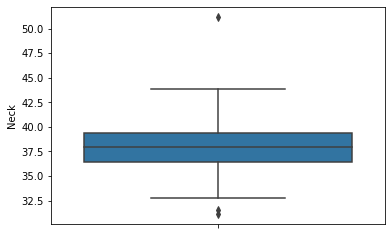

{'missing': 0,
 'min': 31.1,
 'max': 51.2,
 'mean': 37.99,
 'var': 5.91,
 'std': 2.43,
 'range': 20.1,
 'q1': 36.4,
 'q2': 38.0,
 'q3': 39.42,
 'skewness': 0.55,
 'kurtosis': 2.72}

In [11]:
univariate_num(data=bf,x='Neck')

* 0 missing value.
* Outlier on both side in this variable.

#### CHEST

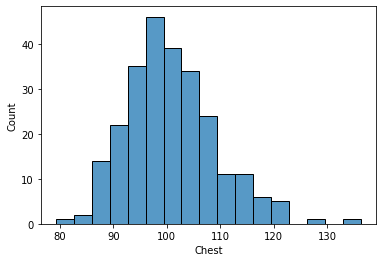

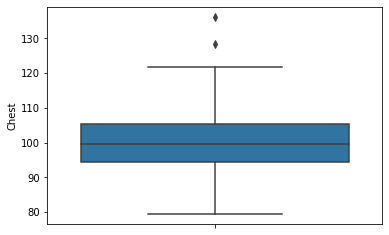

{'missing': 0,
 'min': 79.3,
 'max': 136.2,
 'mean': 100.82,
 'var': 71.07,
 'std': 8.43,
 'range': 56.9,
 'q1': 94.35,
 'q2': 99.65,
 'q3': 105.38,
 'skewness': 0.68,
 'kurtosis': 0.99}

In [13]:
univariate_num(data=bf,x='Chest')

* 0 missing value.
* Outlier on upper side in this variable.

#### ABDOMEN

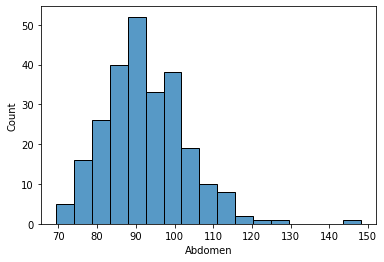

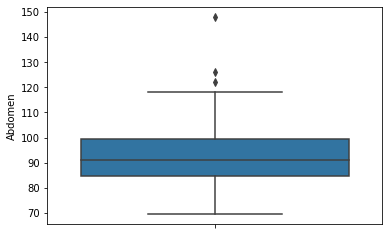

{'missing': 0,
 'min': 69.4,
 'max': 148.1,
 'mean': 92.56,
 'var': 116.27,
 'std': 10.78,
 'range': 78.7,
 'q1': 84.57,
 'q2': 90.95,
 'q3': 99.32,
 'skewness': 0.84,
 'kurtosis': 2.25}

In [16]:
univariate_num(data=bf,x='Abdomen')

* 0 missing value.
* Outlier on upper side.

#### HIP

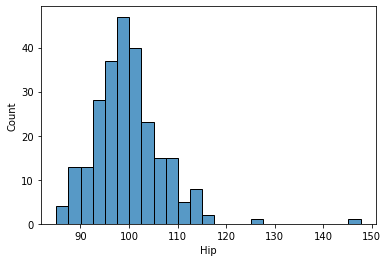

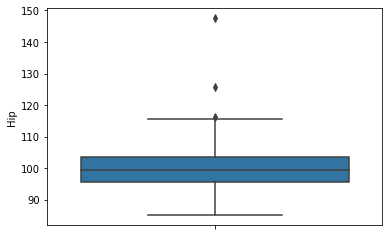

{'missing': 0,
 'min': 85.0,
 'max': 147.7,
 'mean': 99.9,
 'var': 51.32,
 'std': 7.16,
 'range': 62.7,
 'q1': 95.5,
 'q2': 99.3,
 'q3': 103.52,
 'skewness': 1.5,
 'kurtosis': 7.47}

In [17]:
univariate_num(data=bf,x='Hip')

* 0 missing value.
* Outlier on upper side.

#### THIGH

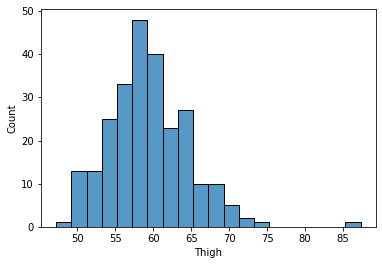

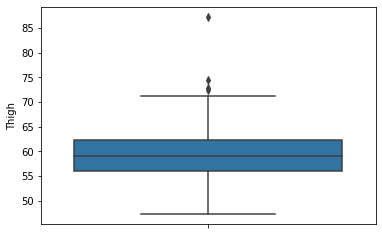

{'missing': 0,
 'min': 47.2,
 'max': 87.3,
 'mean': 59.41,
 'var': 27.56,
 'std': 5.25,
 'range': 40.1,
 'q1': 56.0,
 'q2': 59.0,
 'q3': 62.35,
 'skewness': 0.82,
 'kurtosis': 2.67}

In [16]:
univariate_num(data=bf,x='Thigh')

* 0 missing value.
* Outlier on upper side.

#### KNEE

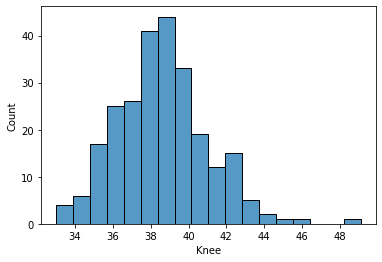

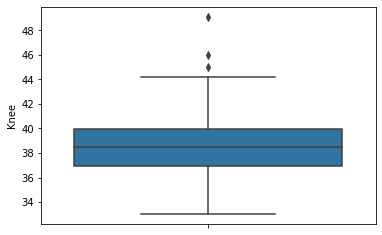

{'missing': 0,
 'min': 33.0,
 'max': 49.1,
 'mean': 38.59,
 'var': 5.82,
 'std': 2.41,
 'range': 16.1,
 'q1': 36.98,
 'q2': 38.5,
 'q3': 39.92,
 'skewness': 0.52,
 'kurtosis': 1.06}

In [17]:
univariate_num(data=bf,x='Knee')

* 0 missing value.
* Outlier on upper side.

#### ANKLE

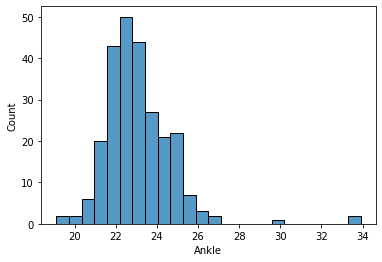

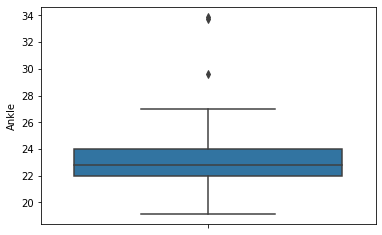

{'missing': 0,
 'min': 19.1,
 'max': 33.9,
 'mean': 23.1,
 'var': 2.87,
 'std': 1.69,
 'range': 14.8,
 'q1': 22.0,
 'q2': 22.8,
 'q3': 24.0,
 'skewness': 2.26,
 'kurtosis': 11.95}

In [18]:
univariate_num(data=bf,x='Ankle')

* 0 missing value.
* Outlier on upper side.

#### BICEPS

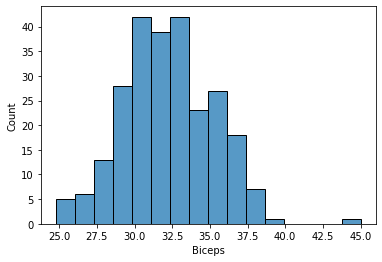

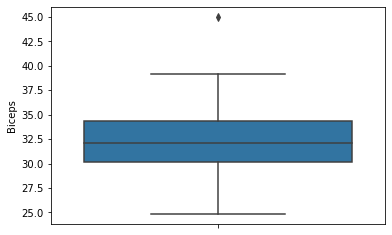

{'missing': 0,
 'min': 24.8,
 'max': 45.0,
 'mean': 32.27,
 'var': 9.13,
 'std': 3.02,
 'range': 20.2,
 'q1': 30.2,
 'q2': 32.05,
 'q3': 34.32,
 'skewness': 0.29,
 'kurtosis': 0.5}

In [20]:
univariate_num(data=bf,x='Biceps')

* 0 missing value.
* Outlier on upper side.

#### FOREARM

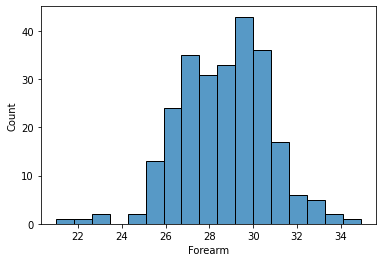

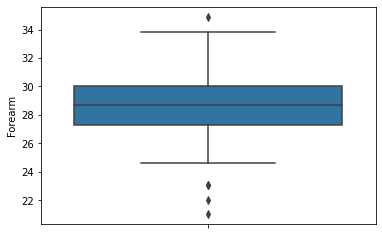

{'missing': 0,
 'min': 21.0,
 'max': 34.9,
 'mean': 28.66,
 'var': 4.08,
 'std': 2.02,
 'range': 13.9,
 'q1': 27.3,
 'q2': 28.7,
 'q3': 30.0,
 'skewness': -0.22,
 'kurtosis': 0.87}

In [21]:
univariate_num(data=bf,x='Forearm')

* 0 missing value.
* Outlier on both side.

#### WRIST

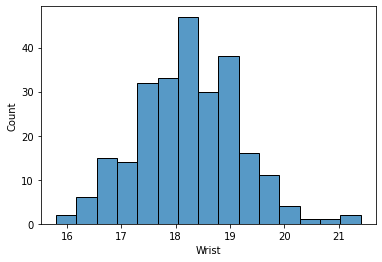

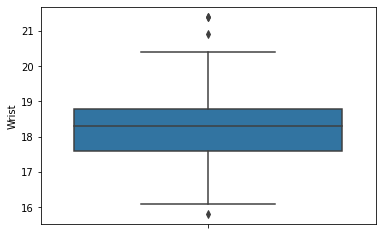

{'missing': 0,
 'min': 15.8,
 'max': 21.4,
 'mean': 18.23,
 'var': 0.87,
 'std': 0.93,
 'range': 5.6,
 'q1': 17.6,
 'q2': 18.3,
 'q3': 18.8,
 'skewness': 0.28,
 'kurtosis': 0.4}

In [22]:
univariate_num(data=bf,x='Wrist')

* 0 missing value.
* Outlier on both side.

#### BODYFAT

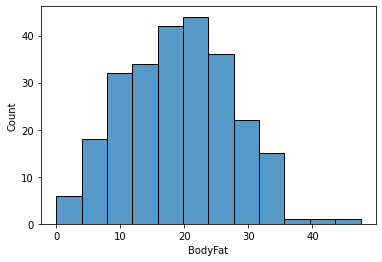

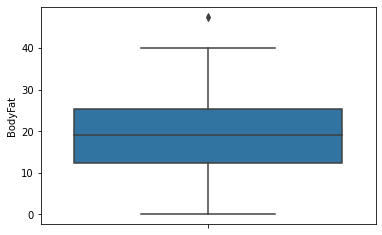

{'missing': 0,
 'min': 0.0,
 'max': 47.5,
 'mean': 19.15,
 'var': 70.04,
 'std': 8.37,
 'range': 47.5,
 'q1': 12.48,
 'q2': 19.2,
 'q3': 25.3,
 'skewness': 0.15,
 'kurtosis': -0.33}

In [23]:
univariate_num(data=bf,x='BodyFat')

* 0 missing value.
* Outlier on upper side.
* minimum value is 0 and body fat can not be 0 of a person.

In [26]:
bf2=bf[bf['BodyFat']>0]

* Here i drop the records which has 0 BodyFat.

#### DENSITY

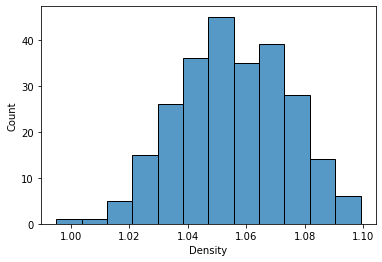

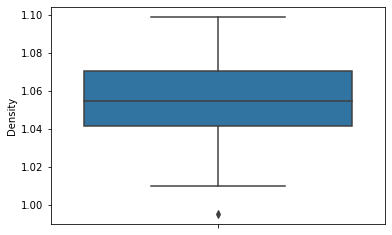

{'missing': 0,
 'min': 0.99,
 'max': 1.1,
 'mean': 1.06,
 'var': 0.0,
 'std': 0.02,
 'range': 0.11,
 'q1': 1.04,
 'q2': 1.05,
 'q3': 1.07,
 'skewness': -0.08,
 'kurtosis': -0.41}

In [27]:
univariate_num(data=bf2,x='Density')

* 0 missing  value.
* Outlier on lower side.

## Bivariate Analysis
* Analyzing Two variable

In [29]:
bf2.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

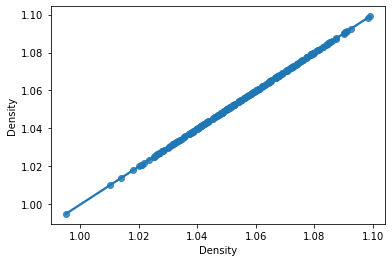

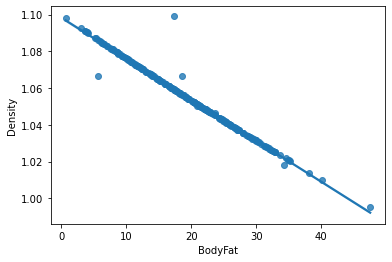

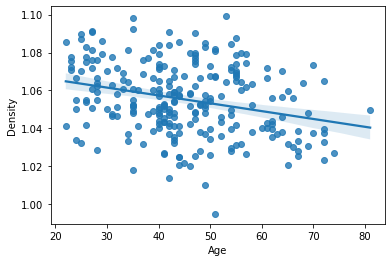

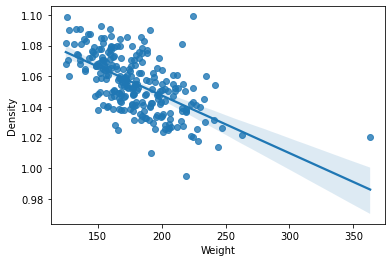

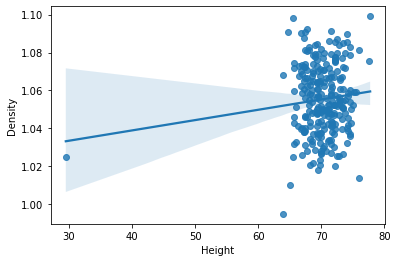

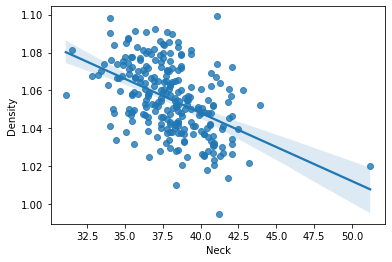

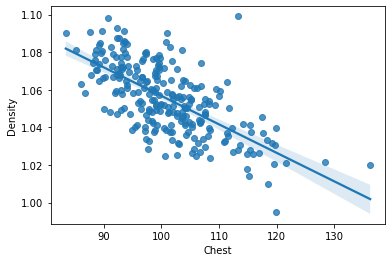

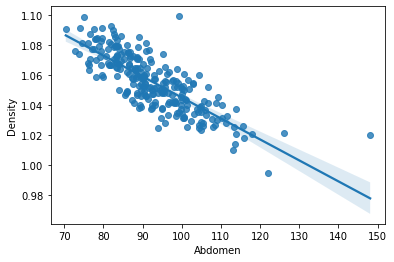

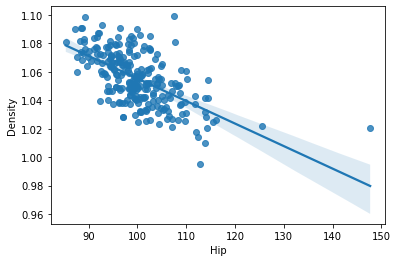

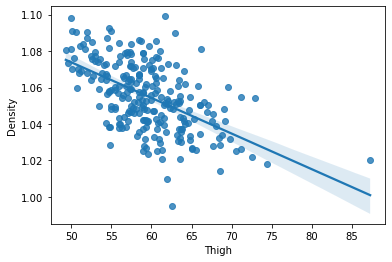

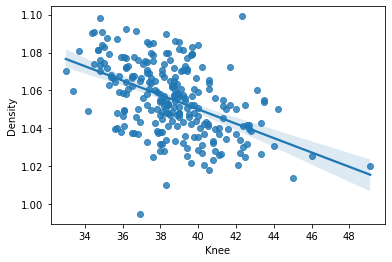

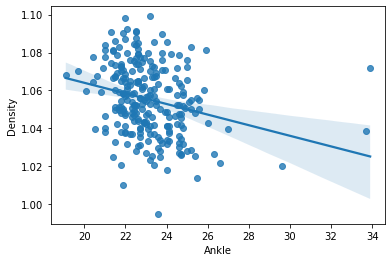

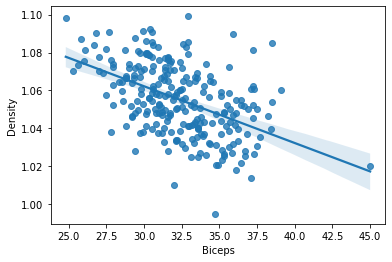

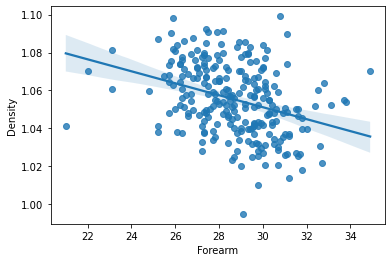

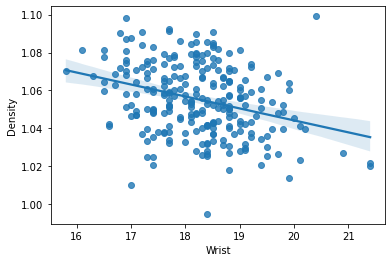

In [30]:
for i in bf2.columns:
    sns.regplot( data=bf2,x=bf2[i],y=bf2["Density"])
    plt.show()

* Density and BodyFat has high correlation.
* As the weight increases density decreses.
* As the Chest circumfrence  increases density decreses.

## Outlier

In [49]:
bf2.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Density,251.0,1.055361,0.018768,0.995,1.016,1.0207,1.02265,1.025,1.0257,1.0313,1.0414,1.0549,1.07035,1.0796,1.08505,1.0862,1.0887,1.0906,1.09185,1.0991
BodyFat,251.0,19.227092,8.297174,0.700,3.700,4.0000,5.25000,5.700,6.2000,8.5000,12.5000,19.2000,25.30000,30.0000,32.60000,32.9000,33.9500,34.8000,36.65000,47.5000
Age,251.0,44.904382,12.623423,22.000,23.000,23.0000,24.00000,25.000,25.0000,27.0000,35.5000,43.0000,54.00000,63.0000,67.00000,69.0000,70.0000,72.0000,72.00000,81.0000
Weight,251.0,179.165139,29.197859,125.000,126.125,127.5000,133.37500,135.750,136.8750,147.7500,159.2500,176.7500,197.00000,217.0000,225.75000,228.2500,233.5000,241.2500,245.75000,363.1500
Height,251.0,70.157371,3.667647,29.500,64.375,65.5000,65.75000,65.750,65.8750,67.0000,68.2500,70.0000,72.25000,73.7500,74.50000,74.5000,74.7500,75.2500,76.00000,77.7500
Neck,251.0,38.008765,2.421240,31.100,33.000,33.6000,34.00000,34.100,34.3000,35.2000,36.4000,38.0000,39.45000,40.9000,41.85000,42.0000,42.1000,42.1000,43.00000,51.2000
Chest,251.0,100.909960,8.336466,83.400,86.350,87.7000,88.50000,88.700,89.2000,91.2000,94.5000,99.7000,105.45000,112.3000,116.40000,117.6000,118.8500,119.7000,120.75000,136.2000
Abdomen,251.0,92.648207,10.704509,70.400,73.800,75.0000,76.15000,76.500,77.3500,79.6000,84.9000,91.0000,99.45000,105.7000,110.80000,113.1000,113.7500,115.6000,120.05000,148.1000
Hip,251.0,99.964143,7.115959,85.300,87.550,88.5000,88.60000,89.000,89.2000,91.9000,95.5500,99.3000,103.55000,108.8000,112.15000,113.8000,114.0000,114.4000,115.80000,147.7000
Thigh,251.0,59.454582,5.203261,49.300,50.000,50.1000,50.65000,50.900,51.3000,53.0000,56.0500,59.0000,62.40000,66.0000,68.55000,69.0000,69.6500,71.2000,72.70000,87.3000


* 'BodyFat','Weight','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps'
- These varaibles have outliers.

In [50]:
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    return x

In [51]:
a=['BodyFat','Weight','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps']
upp=bf2[a]
upp1=upp.apply(Uoutliers_percentile)

* Here i am removing  upper side Outlier.

In [52]:
d=['Density','Age','Height','Forearm','Wrist']
rem=bf2[d]
bf_cleaned=pd.concat([upp1,rem],axis=1)
bf_cleaned.head()

,BodyFat,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Density,Age,Height,Forearm,Wrist
0,12.3,154.25,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,1.0708,23,67.75,27.4,17.1
1,6.1,173.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,1.0853,22,72.25,28.9,18.2
2,25.3,154.00,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,1.0414,22,66.25,25.2,16.6
3,10.4,184.75,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,1.0751,26,72.25,29.4,18.2
4,28.7,184.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,1.0340,24,71.25,27.7,17.7


* Merging all the tables.

## Feature Engineering

In [55]:
bf_cleaned['BMI']=703*bf_cleaned['Weight']/(bf_cleaned['Height']*bf_cleaned['Height'])

*  Here i am creating new variable name BMI.

In [57]:
bf_cleaned['ACRatio']=bf_cleaned['Abdomen']/bf_cleaned['Chest']
bf_cleaned['HTRatio']=bf_cleaned['Hip']/bf_cleaned['Thigh']

* Here i am creating variable by ratio of Highly correlated variable.

In [59]:
bf3=bf_cleaned.drop(columns=['Weight','Height','Abdomen','Chest','Hip','Thigh'])

* dropping the variables which i have created  another mix variables above.

## Multicollinearity

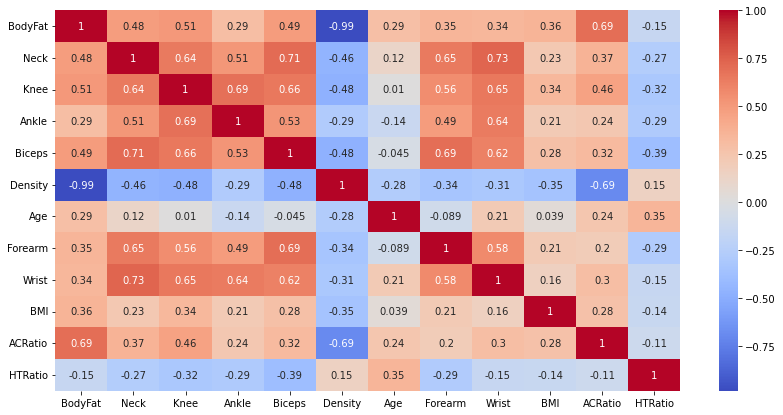

In [60]:
cr=bf3.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cr,annot=True,cmap='coolwarm')
plt.show()

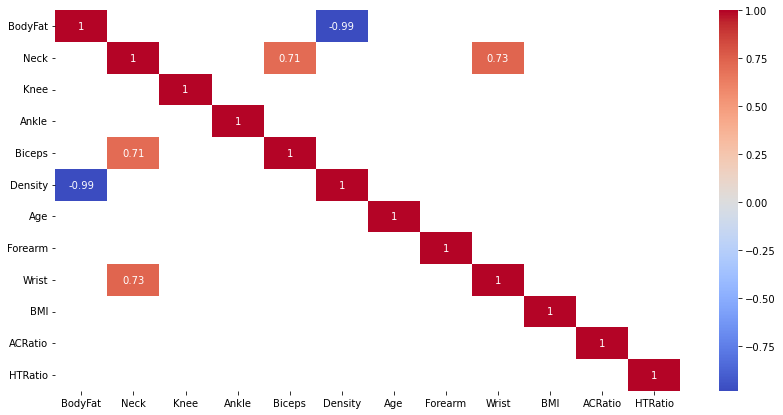

In [61]:
crr=cr[abs(cr)>.7]
plt.figure(figsize=(14,7))
sns.heatmap(crr,annot=True,cmap='coolwarm')
plt.show()

* Checking the  Highly correlated variables.

## VIF

- VIF is a term or is a measurement through which we can know which variable in the data are highly correlated with each other.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = bf3[['Neck','Knee','Biceps','Ankle','Forearm', 'Density','BodyFat',
       'Wrist', 'Age', 'BMI', 'ACRatio', 'HTRatio']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(by=["VIF"], ascending=False)

,feature,VIF
5,Density,2058.362796
7,Wrist,1349.194449
11,HTRatio,901.444121
1,Knee,883.896544
0,Neck,878.332476
10,ACRatio,818.281423
3,Ankle,628.098762
4,Forearm,471.029553
2,Biceps,375.675891
6,BodyFat,28.135957


In [92]:
X = bf3[['BodyFat',
     'Age', 'BMI',  'HTRatio']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(by=["VIF"], ascending=False)

,feature,VIF
3,HTRatio,21.437395
1,Age,16.495715
2,BMI,9.673144
0,BodyFat,8.227924


* Here is the remaining variables after removing highly correlated variables.

## OLS METHOD

In [93]:
import statsmodels.api as sm

X=bf3[['BodyFat',
       'Age', 'BMI', 'HTRatio']]
  
Y=bf3["Density"]

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     2072.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          4.38e-188
Time:                        14:46:18   Log-Likelihood:                 1087.3
No. Observations:                 251   AIC:                            -2165.
Df Residuals:                     246   BIC:                            -2147.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1037      0.006    193.121      0.0

* Here we see R^2 because it is a measurement metrics to tell how's your model is fitting.
* R^2 is .971 so  it  means that our  model is good.

In [94]:
b=['BodyFat',
       'Age', 'BMI', 'HTRatio','Density']
bf_final=bf3[b]
bf_final.head()

,BodyFat,Age,BMI,HTRatio,Density
0,12.3,23,23.624460,1.601695,1.0708
1,6.1,22,23.332048,1.681431,1.0853
2,25.3,22,24.666315,1.664430,1.0414
3,10.4,26,24.880784,1.683860,1.0751
4,28.7,24,25.514854,1.612342,1.0340


## Normality Check

Y should be normally distributed
* By Graph ( Histogram -sns) (distplot-sns)
* Hypothesis Testing ( Shapiro -Sample size < 5000) ( Jarque Bera Sample Size > 5000)


**Shapiro Normality Test** <br>
Null Hypo= Data is normally distributed<br>
Alter Hyp= Data is not normally distributed <br>
CI =95%<br>
Alpha =.05<br>
Decision Rule :<br>
-----    if p value >= Alpha : accept Null Hypothesis <br>
-----    if p value < alpha : Reject Null Hypo<br>

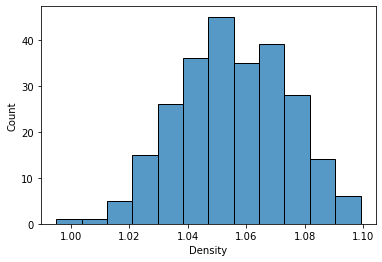

In [95]:
sns.histplot(bf_final["Density"])
plt.show()

In [96]:
shapiro(bf_final["Density"])

ShapiroResult(statistic=0.9928699731826782, pvalue=0.27213144302368164)

* Target Variable is Normaly Distributed.

## Model Development

* seperate x,y.
* Split into Train and Test.
* Run Model on Train Data and validate on Train and Test (MSE,RMSE,MAE,MAPE)

In [97]:
bf_final.columns

Index(['BodyFat', 'Age', 'BMI', 'HTRatio', 'Density'], dtype='object')

In [98]:
x=bf_final.drop(columns=['Density'])
y=bf_final['Density']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

### Linear Regression

In [125]:
help(lr)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [100]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
lr.coef_

array([-2.30216295e-03,  2.99557453e-05,  3.59569836e-06, -4.96830304e-03])

In [102]:
lr.intercept_

1.1063973629796604

In [124]:
print("Train R^2 : ", lr.score(x_train, y_train))
print("Test R^2 : ", lr.score(x_test, y_test))

Train R^2 :  0.9661148997858033
Test R^2 :  0.9932608248724498


In [105]:
pd.DataFrame({"Var":x_train.columns, "Coef":abs(lr.coef_)/sum(abs(lr.coef_))})

,Var,Coef
0,BodyFat,0.315191
1,Age,0.004101
2,BMI,0.000492
3,HTRatio,0.680215


In [106]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [107]:
pred_act_train=pd.DataFrame({"Act":(y_train)**2,"pred":(pred_train)**2})
pred_act_train.head(4)

,Act,pred
229,1.123812,1.124299
183,1.147684,1.148306
238,1.145970,1.149564
33,1.102920,1.103929


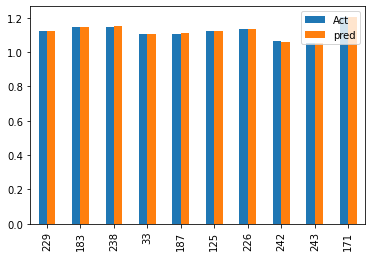

In [108]:
pred_act_train.head(10).plot(kind="bar")
plt.show()

* Here we compare our predicte value to actual value on train data.

In [109]:
pred_act_test=pd.DataFrame({"Act":(y_test)**2,"pred":(pred_test)**(2)})
pred_act_test.head(4)

,Act,pred
153,1.125721,1.125681
122,1.134651,1.135999
92,1.165320,1.166380
158,1.145756,1.144230


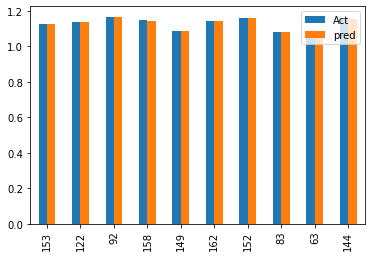

In [110]:
pred_act_test.head(10).plot(kind="bar")
plt.show()

In [111]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 1.2945308478190407e-05
Train rmse 0.003597958932254565
Train MAE 0.0008748038588369521
Train MAPE 0.0008290839849870114


In [112]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 1.7141793700864327e-06
Test rmse 0.0013092667299242093
Test MAE 0.0005785765075439424
Test MAPE 0.0005464590421592328


### Model Prediction on New Data

In [113]:
from joblib import load, dump

In [115]:
dump(lr, "lrregressor.joblib")

['lrregressor.joblib']

In [116]:
from joblib import load

In [117]:
mymodel=load("lrregressor.joblib")

In [118]:
mymodel

LinearRegression()

In [131]:
newdata=pd.DataFrame({'BodyFat':[12.3],
                      'Age':[32], 
                      'BMI':[23.62], 
                      'HTRatio':[1.60]})

In [132]:
(mymodel.predict(newdata))

array([1.07117499])